---
# <center> Init </center>
---

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy.stats import skew, boxcox
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge

In [38]:
r = Ridge(alpha=10)
l = Lasso(alpha=10)

In [39]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 90)

In [40]:
house_train_df = pd.read_csv('./files/train.csv')
house_train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [41]:
house_test_df = pd.read_csv('./files/test.csv')

In [42]:
sample_submission = pd.read_csv('./files/sample_submission.csv')

---
# <center> Exploring </center>
---

In [43]:
house_train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [44]:
missing_values = house_train_df.isna().sum()
missing_values_df = pd.DataFrame({'name': missing_values[missing_values > 0].index, 
                                  'count': missing_values[missing_values > 0].values, 
                                  'type': house_train_df.dtypes[missing_values > 0].values})
missing_values_df

,name,count,type
0,LotFrontage,259,float64
1,Alley,1369,object
2,MasVnrType,8,object
3,MasVnrArea,8,float64
4,BsmtQual,37,object
5,BsmtCond,37,object
6,BsmtExposure,38,object
7,BsmtFinType1,37,object
8,BsmtFinType2,38,object
9,Electrical,1,object


In [45]:
missing_values_df['count'].sum()

6965

In [46]:
missing_values_df[missing_values_df['type']=='object']['count'].sum()

6617

In [47]:
missing_values_df[missing_values_df['type']=='float64']['count'].sum()

348

### Outliers

<AxesSubplot:>

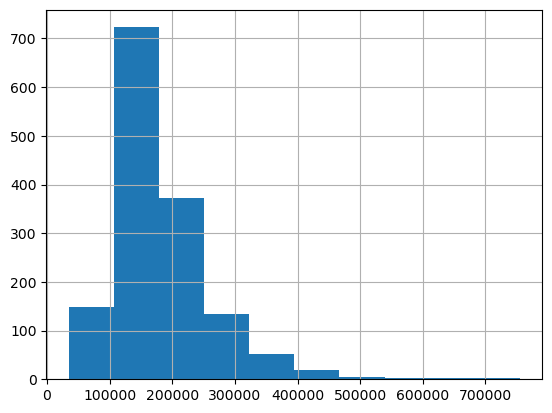

In [48]:
house_train_df.SalePrice.hist()

In [49]:
house_train_df[house_train_df.SalePrice > 600000]['SalePrice']

691     755000
898     611657
1169    625000
1182    745000
Name: SalePrice, dtype: int64

In [50]:
house_train_df.sort_values('SalePrice', ascending=True, inplace=False)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
916,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480,GasA,TA,N,FuseA,480,0,0,480,1,0,0,0,1,1,TA,4,Typ,0,NaN,Detchd,1958.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
968,969,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,3,6,1910,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,600,600,Grav,Fa,N,SBrkr,600,368,0,968,0,0,1,0,2,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,37900
533,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Fa,N,FuseF,334,0,0,334,0,0,1,0,1,1,Fa,2,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2

---
# <center>Removing Outliers</center>

In [51]:
house_train_df = house_train_df.drop(house_train_df[house_train_df['GrLivArea'] > 4000].index).reset_index(drop=True)

<AxesSubplot:>

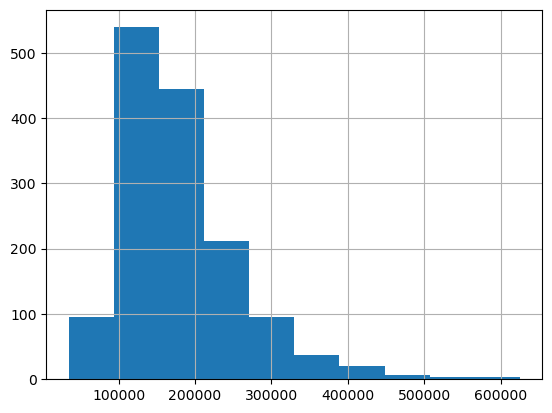

In [52]:
house_train_df.SalePrice.hist()

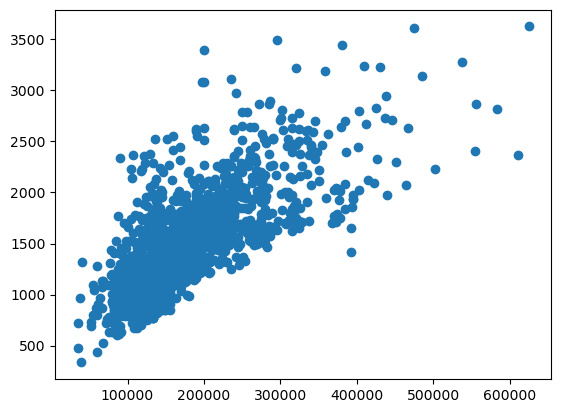

In [53]:
plt.scatter(x='SalePrice', y='GrLivArea', data=house_train_df)

---
# <center>Defining x and y</center>

In [54]:
test_ids = house_test_df['Id']
house_test_df.drop('Id', axis=1, inplace=True)
y = house_train_df['SalePrice']
x = house_train_df.drop(['Id', 'SalePrice'], axis=1)

---
# <center>Cleaning</center>

### Data types

In [55]:
x['MSSubClass'] = x['MSSubClass'].astype(str)
x['MoSold'] = x['MoSold'].astype(str)

# --- Test Data
house_test_df['MSSubClass'] = house_test_df['MSSubClass'].astype(str)
house_test_df['MoSold'] = house_test_df['MoSold'].astype(str)

### Filling missing categorical values

In [56]:
# NA means None - using a constant value
for column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
                ]:
    x[column] = x[column].fillna("None")
    house_test_df[column] = house_test_df[column].fillna("None")

# NA is missing - using the mode
for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
                ]:
    mode = x[column].mode()[0]
    x[column] = x[column].fillna(mode)
    house_test_df[column] = house_test_df[column].fillna(mode)

### Filling missing numeric values

In [57]:
x['GarageYrBlt'] = x['GarageYrBlt'].fillna(x['YearBuilt'])
x['LotFrontage'] = x['LotFrontage'].fillna(x['LotFrontage'].mode()[0])
x['MasVnrArea'] = x['MasVnrArea'].fillna(x['MasVnrArea'].mode()[0])

# --- Test Data
house_test_df['GarageYrBlt'] = house_test_df['GarageYrBlt'].fillna(house_test_df['YearBuilt'])
house_test_df['LotFrontage'] = house_test_df['LotFrontage'].fillna(house_test_df['LotFrontage'].mode()[0])
house_test_df['MasVnrArea'] = house_test_df['MasVnrArea'].fillna(house_test_df['MasVnrArea'].mode()[0])

In [58]:
# --- Test Data
house_test_df['BsmtFullBath'] = house_test_df['BsmtFullBath'].fillna(0)
house_test_df['BsmtHalfBath'] = house_test_df['BsmtHalfBath'].fillna(0)
house_test_df['GarageCars'] = house_test_df['GarageCars'].fillna(0)
house_test_df['GarageArea'] = house_test_df['GarageArea'].fillna(0)
house_test_df['BsmtFinSF1'] = house_test_df['BsmtFinSF1'].fillna(0)
house_test_df['BsmtFinSF2'] = house_test_df['BsmtFinSF2'].fillna(0)
house_test_df['BsmtUnfSF'] = house_test_df['BsmtUnfSF'].fillna(0)
house_test_df['TotalBsmtSF'] = house_test_df['TotalBsmtSF'].fillna(0)

In [59]:
x.isna().sum().sum(), house_test_df.isna().sum().sum()

(0, 0)

---
# <center>Feature Engineering</center>

In [60]:
x['Age'] = (datetime.datetime.now().year) - x['YearBuilt']
x['LivingAreaRatio'] = x['GrLivArea'] / x['LotArea']
x['TotalLotSF'] = x['LotFrontage'] + x['LotArea']
x['IsFunctional'] = x['Functional'].apply(lambda x: 1 if x == 'Typ' else 0)
x['NormalSaleCondition'] = x['SaleCondition'].apply(lambda x: 1 if x == 'Normal' else 0)
x['InsideLotConfig'] = x['LotConfig'].apply(lambda x: 1 if x == 'Inside' else 0)
x['HasPavedDrive'] = x['PavedDrive'].apply(lambda x: 1 if x == 'Y' else 0)
x['HasFireplace'] = x['FireplaceQu'].apply(lambda x: 0 if x == None else 1)
x['TotalSF'] = x['1stFlrSF'] + x['2ndFlrSF'] + x['TotalBsmtSF']
x['TotalGarageSpaces'] = x['GarageCars']
x['TotalFireplaces'] = x['Fireplaces']

quality_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
x['ExterQualNum'] = x['ExterQual'].map(quality_mapping)


# --- Test Data

house_test_df['Age'] = (datetime.datetime.now().year) - (house_test_df['YearBuilt'])
house_test_df['LivingAreaRatio'] = house_test_df['GrLivArea'] / house_test_df['LotArea']
house_test_df['TotalLotSF'] = house_test_df['LotFrontage'] + house_test_df['LotArea']
house_test_df['IsFunctional'] = house_test_df['Functional'].apply(lambda x: 1 if x == 'Typ' else 0)
house_test_df['NormalSaleCondition'] = house_test_df['SaleCondition'].apply(lambda x: 1 if x == 'Normal' else 0)
house_test_df['InsideLotConfig'] = house_test_df['LotConfig'].apply(lambda x: 1 if x == 'Inside' else 0)
house_test_df['HasPavedDrive'] = house_test_df['PavedDrive'].apply(lambda x: 1 if x == 'Y' else 0)
house_test_df['HasFireplace'] = house_test_df['FireplaceQu'].apply(lambda x: 0 if x == None else 1)
house_test_df['TotalSF'] = house_test_df['1stFlrSF'] + house_test_df['2ndFlrSF'] + house_test_df['TotalBsmtSF']
house_test_df['TotalGarageSpaces'] = house_test_df['GarageCars']
house_test_df['TotalFireplaces'] = house_test_df['Fireplaces']

quality_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
house_test_df['ExterQualNum'] = house_test_df['ExterQual'].map(quality_mapping)

---
# <center>Transforming Skew</center>

In [61]:
skew_df = pd.DataFrame(x.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda f: skew(x[f]))
skew_df['AbsoluteSkew'] = skew_df['Skew'].apply(abs)
skewed_columns = skew_df.query("AbsoluteSkew >= 0.5")['Feature'].values

for column in skewed_columns:
    x[column] = boxcox(x[column] + 0.1)[0]

# --- Test Data
skew_df = pd.DataFrame(house_test_df.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda f: skew(house_test_df[f]))
skew_df['AbsoluteSkew'] = skew_df['Skew'].apply(abs)
skewed_columns = skew_df.query("AbsoluteSkew >= 0.5")['Feature'].values

for column in skewed_columns:
    house_test_df[column] = boxcox(house_test_df[column] + 0.1)[0]

/var/folders/g2/gz67rpnj04d3p0y0b84qbync0000gn/T/ipykernel_16967/1455761697.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew_df['Skew'] = skew_df['Feature'].apply(lambda f: skew(x[f]))
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/var/folders/g2/gz67rpnj04d3p0y0b84qbync0000gn/T/ipykernel_16967/1455761697.py:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew_df['Skew'] = skew_df['Feature'].apply(lambda f: skew(house_test_df[f]))


---
# <center>Cosine Transform for Cyclical Features</center>

In [62]:
x['MoSold'] = (-np.cos(0.5236 * x['MoSold'].astype(float)))

# --- Test Data
house_test_df['MoSold'] = (-np.cos(0.5236 * house_test_df['MoSold'].astype(float)))

---
# <center>Scaling</center>

In [63]:
scaler = StandardScaler()

df_n = x.select_dtypes([np.number])
scaled_data = scaler.fit_transform(df_n)
df_scaled = pd.DataFrame(scaled_data, index=df_n.index, columns=df_n.columns)
x[df_scaled.columns] = df_scaled

# --- Test Data
df_n = house_test_df.select_dtypes([np.number])
scaled_data = scaler.fit_transform(df_n)
df_scaled = pd.DataFrame(scaled_data, index=df_n.index, columns=df_n.columns)
house_test_df[df_scaled.columns] = df_scaled

---
# <center>Encoding</center>

In [64]:
df_obj = x.select_dtypes(['object'])
encoder = OneHotEncoder(handle_unknown='ignore', categories='auto')
encoder.fit(df_obj)

x_encoded = encoder.transform(x[df_obj.columns])
x_encoded_names = encoder.get_feature_names_out(df_obj.columns)

x_encoded_df = pd.DataFrame(x_encoded.toarray(), columns=x_encoded_names)
x = pd.concat([x, x_encoded_df], axis=1)
x.drop(df_obj.columns, axis=1, inplace=True)

# --- Test Data

house_test_encoded = encoder.transform(house_test_df[df_obj.columns])

house_test_encoded_df = pd.DataFrame(house_test_encoded.toarray(), columns=x_encoded_names)
house_test_df = pd.concat([house_test_df, house_test_encoded_df], axis=1)
house_test_df.drop(df_obj.columns, axis=1, inplace=True)

---
# <center>Target Transformation</center>

<AxesSubplot:>

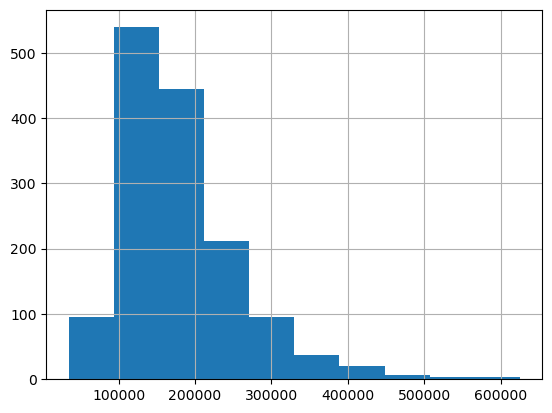

In [65]:
y.hist()

<AxesSubplot:>

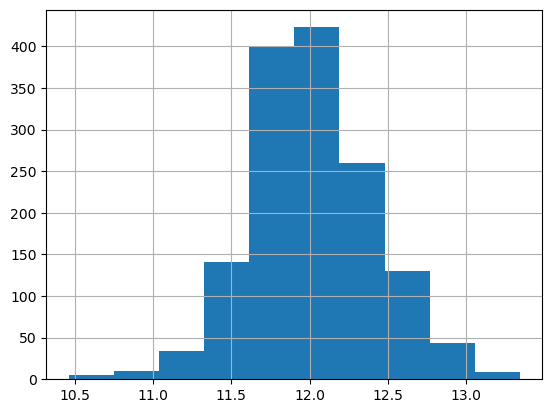

In [66]:
y = np.log1p(y)
y.hist()

---
# <center>Train | Predict | Test</center>

### Weighted average prediction (2% lasso, 98% Ridge)

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

ridge_model = r.fit(X=x_train, y=y_train)
ridge_preds = np.expm1(ridge_model.predict(x_test))

lasso_model = l.fit(X=x_train, y=y_train)
lasso_preds = np.expm1(lasso_model.predict(x_test))

weighted_preds = 0.98 * ridge_preds + 0.02 * lasso_preds

y_test_exp = np.expm1(y_test)
rmse = (mean_squared_error(y_test_exp, weighted_preds)) ** .5
print("RMSE: ", rmse)

final_weighted_preds = 0.98 * ridge_model.predict(house_test_df) + 0.02 * lasso_model.predict(house_test_df)
final_weighted_preds_exp = np.expm1(final_weighted_preds)


RMSE:  19937.924088819516


---
# <center>Submission</center>

In [68]:
submission = pd.concat([test_ids, pd.Series(final_weighted_preds_exp, name='SalePrice')], axis=1)
submission

,Id,SalePrice
0,1461,123164.220399
1,1462,162821.093669
2,1463,188599.167167
3,1464,201616.653883
4,1465,186548.687738
...,...,...
1454,2915,92359.040553
1455,2916,82040.678350
1456,2917,175351.545750
1457,2918,120989.134631


In [69]:
# submission.to_csv('./files/submissions/submission.csv', index=False, header=True)